In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances

# load training and testing datasets
train_data = pd.read_csv('E:/MSIS/AY 24 Semester 1/IN6227 Data Mining/Assignments/Assignments 1/Census Income Data Set/adult.data',
                          header=None, na_values=' ?', skipinitialspace=True)
test_data = pd.read_csv('E:/MSIS\AY 24 Semester 1/IN6227 Data Mining/Assignments/Assignments 1/Census Income Data Set/adult.test',
                         header=None, na_values=' ?', skipinitialspace=True, skiprows=1)

# define column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country', 'income']

train_data.columns = column_names
test_data.columns = column_names

# drop rows with missing, duplicated values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

# encode categorical variables
le = LabelEncoder()
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column] = le.fit_transform(train_data[column])

for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = le.fit_transform(test_data[column])

# split the training data into training and validation sets (80:20)
X = train_data.drop('income', axis=1)
y = train_data['income']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# custom KNN Class
class CustomKNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        distances = pairwise_distances(X, self.X_train, metric='euclidean')
        neighbors_indices = np.argsort(distances, axis=1)[:, :self.k]
        top_k_labels = self.y_train.values[neighbors_indices]
        
        # Get the most common class among neighbors
        return np.array([np.bincount(row).argmax() for row in top_k_labels])

# evaluate the KNN model for different k values
k_values = range(1, 21)
validation_accuracies = []
test_accuracies = []

for k in k_values:
    # train KNN model
    knn = CustomKNN(k=k)
    knn.fit(X_train, y_train)

    # validate the model
    y_val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(val_accuracy)

    # evaluate the model on the test data
    X_test = test_data.drop('income', axis=1)
    y_test = test_data['income']
    y_test_pred = knn.predict(X_test)

    # calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    print(f'K={k}: Validation Accuracy: {val_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%')
    print(classification_report(y_test, y_test_pred))

K=1: Validation Accuracy: 73.02%, Test Accuracy: 72.47%
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     12430
           1       0.42      0.44      0.43      3846

    accuracy                           0.72     16276
   macro avg       0.62      0.63      0.63     16276
weighted avg       0.73      0.72      0.73     16276

K=2: Validation Accuracy: 78.90%, Test Accuracy: 78.27%
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     12430
           1       0.59      0.26      0.36      3846

    accuracy                           0.78     16276
   macro avg       0.70      0.60      0.61     16276
weighted avg       0.75      0.78      0.75     16276

K=3: Validation Accuracy: 75.65%, Test Accuracy: 75.87%
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     12430
           1       0.49      0.36      0.41      3846

    accuracy  

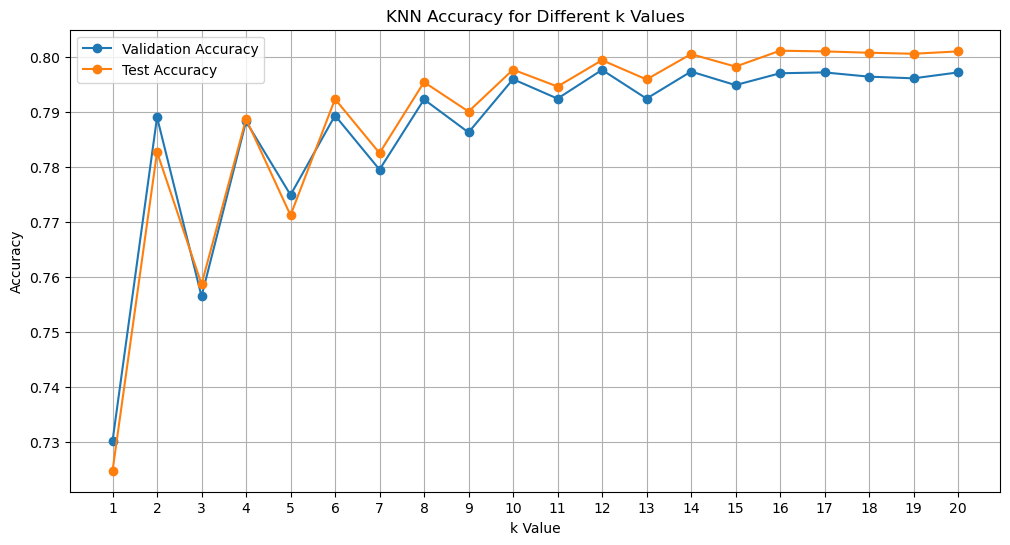

In [3]:
# plot the results for validation accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_values, validation_accuracies, label='Validation Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

In [5]:
k_values = range(1, 21)
validation_accuracies = []
test_accuracies = []

import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for k in k_values:
    # train KNN model
    start_train_time = time.time()
    knn = CustomKNN(k=k)
    knn.fit(X_train, y_train)
    train_time = time.time() - start_train_time

    # validate the model
    y_val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(val_accuracy)

    # evaluate the model on the test data
    X_test = test_data.drop('income', axis=1)
    y_test = test_data['income']
    start_pred_time = time.time()
    y_test_pred = knn.predict(X_test)
    pred_time = time.time() - start_pred_time

    # calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    confusion = confusion_matrix(y_test, y_test_pred)

    print(f'K={k}: Validation Accuracy: {val_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%')
    print(classification_report(y_test, y_test_pred))
    print(f'Training Time: {train_time:.4f} seconds')
    print(f'Prediction Time: {pred_time:.4f} seconds')
    print("Confusion Matrix:\n", confusion)

K=1: Validation Accuracy: 73.02%, Test Accuracy: 72.47%
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     12430
           1       0.42      0.44      0.43      3846

    accuracy                           0.72     16276
   macro avg       0.62      0.63      0.63     16276
weighted avg       0.73      0.72      0.73     16276

Training Time: 0.0000 seconds
Prediction Time: 28.0427 seconds
Confusion Matrix:
 [[10095  2335]
 [ 2145  1701]]
K=2: Validation Accuracy: 78.90%, Test Accuracy: 78.27%
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     12430
           1       0.59      0.26      0.36      3846

    accuracy                           0.78     16276
   macro avg       0.70      0.60      0.61     16276
weighted avg       0.75      0.78      0.75     16276

Training Time: 0.0000 seconds
Prediction Time: 28.0893 seconds
Confusion Matrix:
 [[11749   681]
 [ 2856   990]]
K=3: Val

Validation Accuracy: 77.49%
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4905
           1       0.57      0.34      0.42      1603

    accuracy                           0.77      6508
   macro avg       0.69      0.63      0.64      6508
weighted avg       0.75      0.77      0.75      6508

Test Accuracy: 77.12%
Confusion Matrix:
 [[11355  1075]
 [ 2649  1197]]


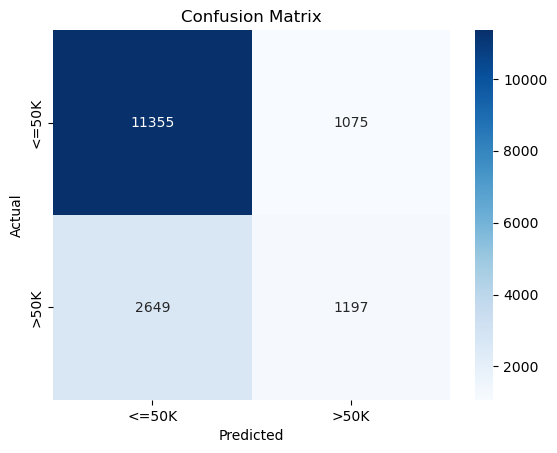

Training Time: 0.00 seconds
Prediction Time: 11.10 seconds


In [9]:
# record training time
start_time = time.time()
knn = CustomKNN(k=5)
knn.fit(X_train, y_train)
training_time = time.time() - start_time

# validation Prediction
start_time = time.time()
y_val_pred = knn.predict(X_val)
prediction_time = time.time() - start_time

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(classification_report(y_val, y_val_pred))

# test Data Evaluation
X_test = test_data.drop('income', axis=1)
y_test = test_data['income']

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# plot Confusion Matrix

import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.2f} seconds")